In [1]:
import torch.nn as nn
import torch

In [2]:
from torchvision import datasets, transforms

In [3]:
data_path = "../dataset/chapter 7/"

In [4]:
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified


In [5]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified


In [6]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [7]:
conv = nn.Conv2d(3, 16, kernel_size=3)
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [8]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [9]:
connected_model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

In [10]:
img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

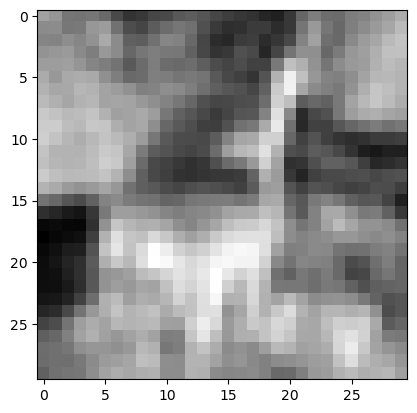

In [11]:
from matplotlib import pyplot as plt
plt.imshow(output[0,0].detach(), cmap='gray')
plt.show()

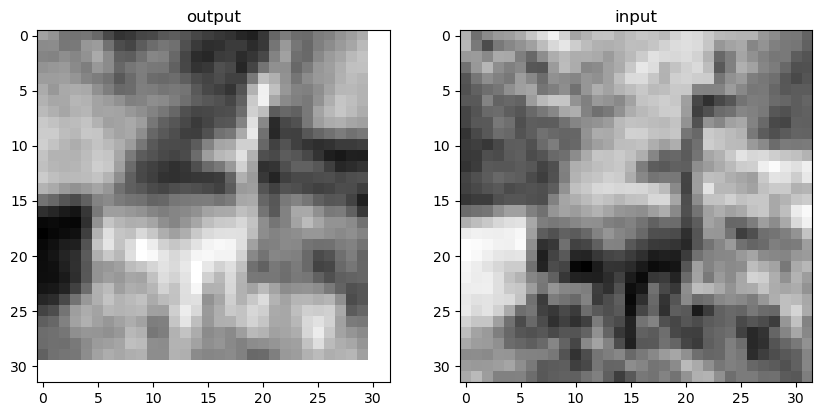

In [12]:
plt.figure(figsize=(10, 4.8))
ax1 = plt.subplot(1, 2, 1)
plt.title('output')
plt.imshow(output[0, 0].detach(), cmap="gray")
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
plt.imshow(img.mean(0), cmap="gray")
plt.title('input')
plt.savefig('dataset/chapter 8/chapter 8 input')
plt.show()

In [13]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

In [14]:
with torch.no_grad():
    conv.bias.zero_()

In [15]:
with torch.no_grad():
    conv.weight.fill_(1.0/9.0)

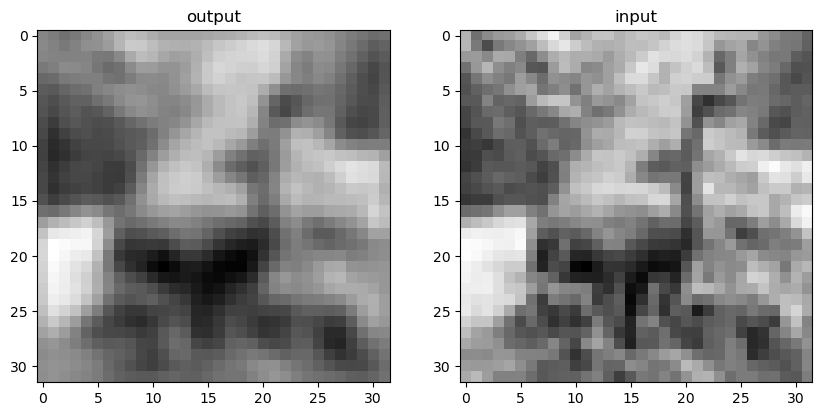

In [16]:
output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))
ax1 = plt.subplot(1, 2, 1)
plt.title('output')
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
plt.imshow(img.mean(0), cmap='gray')
plt.title('input')
plt.savefig("dataset/chapter 8/chapter 8 conv")
plt.show()

In [17]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()
    
conv

Conv2d(3, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

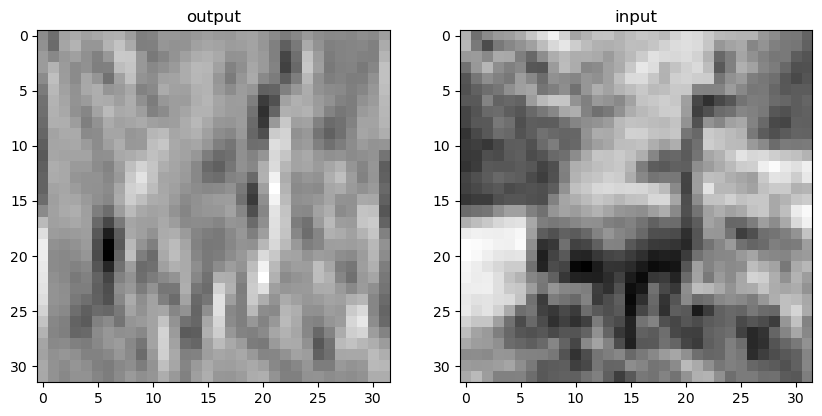

In [18]:
output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))
ax1 = plt.subplot(1, 2, 1)
plt.title('output')
plt.imshow(output[0, 0].detach(), cmap="gray")
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
plt.imshow(img.mean(0), cmap="gray")
plt.title('input')
plt.savefig("dataset/chapter 8/chapter 8 conv 2")
plt.show()

In [19]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [20]:
model = nn.Sequential(
                nn.Conv2d(3, 16, kernel_size=3, padding=1),
                nn.Tanh(),
                nn.MaxPool2d(2),
                nn.Conv2d(16, 32, kernel_size=3, padding=1),
                nn.Tanh(),
                nn.Conv2d(32, 64, kernel_size=3, padding=1),
                nn.Tanh(),
                nn.Conv2d(64, 128, kernel_size=3, padding=1),
                nn.Tanh(),
                nn.Conv2d(128, 256, kernel_size=3, padding=1),
                nn.Tanh(),
                nn.MaxPool2d(2),
                # ...
                nn.Linear(8 * 8 * 8, 32),
                nn.Tanh(),
                nn.Linear(32, 32)
)

In [21]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(410080,
 [432, 16, 4608, 32, 18432, 64, 73728, 128, 294912, 256, 16384, 32, 1024, 32])

In [22]:
model

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): Tanh()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): Tanh()
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): Tanh()
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): Tanh()
  (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): Tanh()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Linear(in_features=512, out_features=32, bias=True)
  (13): Tanh()
  (14): Linear(in_features=32, out_features=32, bias=True)
)

In [23]:
for name, params in model.named_parameters():
    print(name, ":", params.size())

0.weight : torch.Size([16, 3, 3, 3])
0.bias : torch.Size([16])
3.weight : torch.Size([32, 16, 3, 3])
3.bias : torch.Size([32])
5.weight : torch.Size([64, 32, 3, 3])
5.bias : torch.Size([64])
7.weight : torch.Size([128, 64, 3, 3])
7.bias : torch.Size([128])
9.weight : torch.Size([256, 128, 3, 3])
9.bias : torch.Size([256])
12.weight : torch.Size([32, 512])
12.bias : torch.Size([32])
14.weight : torch.Size([32, 32])
14.bias : torch.Size([32])


In [24]:
model(img.unsqueeze(0))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2048x8 and 512x32)

In [25]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8)
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [26]:
model = Net()

numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [27]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
    
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [28]:
model = Net()
model(img.unsqueeze(0))

tensor([[-0.0614,  0.1039]], grad_fn=<AddmmBackward0>)

In [29]:
import datetime
import torch.optim as optim


def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            
            optimizer.zero_grad()
            
            loss.backward()
            
            optimizer.step()
            
            loss_train += loss.item()
            
        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'), epoch, loss_train/len(train_loader)))

In [30]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = Net()

optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(100, optimizer, model, loss_fn, train_loader)

2023-04-20 10:51:49 Epoch 1, Training loss 0.5636054879161203
2023-04-20 10:54:52 Epoch 10, Training loss 0.32490211459481794
2023-04-20 10:58:15 Epoch 20, Training loss 0.2931860911238725
2023-04-20 11:01:38 Epoch 30, Training loss 0.2696784462803488
2023-04-20 11:05:01 Epoch 40, Training loss 0.2510751553686561
2023-04-20 11:05:35 Epoch 50, Training loss 0.2348428569306993
2023-04-20 11:05:48 Epoch 60, Training loss 0.22158325786233707
2023-04-20 11:06:01 Epoch 70, Training loss 0.20485580389856534
2023-04-20 11:06:14 Epoch 80, Training loss 0.1902107924317858
2023-04-20 11:06:27 Epoch 90, Training loss 0.1749448345819856
2023-04-20 11:06:40 Epoch 100, Training loss 0.15969988029853555


In [31]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)

val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

def validate(model, train_loader, val_loader):
    for name, loader in [("trian", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0
        
        with torch.no_grad():
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
                
        print("Accuray {}: {:.2f}".format(name, correct/total))

validate(model, train_loader, val_loader)

Accuray trian: 0.94
Accuray val: 0.89


In [32]:
data_path = 'dataset/chapter 8/'
torch.save(model.state_dict(), data_path + 'birds_vs_airplanes.pt')

In [33]:
loaded_model = Net()
loaded_model.load_state_dict(torch.load(data_path + 'birds_vs_airplanes.pt'))

<All keys matched successfully>

In [34]:
device = (torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))
print(f"Training on device {device}")

Training on device cuda


In [37]:
list(train_loader), list(val_loader)

([[tensor([[[[ 0.6139, -0.3228, -0.1164,  ..., -0.2593, -0.2752, -0.5451],
             [ 0.6615, -0.1482, -0.8467,  ..., -0.3228, -0.3228, -0.5768],
             [ 0.2329,  0.2646, -0.1005,  ..., -0.3387, -0.6562, -0.7515],
             ...,
             [ 0.2170,  0.2646,  0.1535,  ..., -0.5768, -0.4498,  0.0106],
             [ 0.5980,  0.4393,  0.3281,  ..., -0.6404, -0.4340,  0.0265],
             [ 0.9156,  0.8044,  0.4551,  ..., -0.4975, -0.5451, -0.0529]],
   
            [[ 1.3369,  0.2740,  0.4028,  ...,  0.3867,  0.3867,  0.0968],
             [ 1.4497,  0.5961, -0.2253,  ...,  0.3062,  0.3062,  0.0646],
             [ 1.0954,  1.1276,  0.6444,  ...,  0.2579, -0.0481, -0.1286],
             ...,
             [ 0.4028,  0.5156,  0.5317,  ...,  0.1774,  0.4028,  0.8538],
             [ 0.5478,  0.6605,  0.6605,  ...,  0.1130,  0.4028,  0.8860],
             [ 0.4834,  0.9504,  0.4995,  ...,  0.1774,  0.1613,  0.7572]],
   
            [[-0.4487, -0.7935, -0.1939,  ..., -0.6136

In [45]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            
            labels = labels.to(device=device)
            
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            loss_train += loss.item()
            
        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'), epoch, loss_train/len(train_loader)))
            
        

In [46]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = Net().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs=100, optimizer=optimizer, model = model, loss_fn=loss_fn, train_loader=train_loader)

2023-04-20 11:20:29 Epoch 1, Training loss 0.5883934974290763
2023-04-20 11:20:31 Epoch 10, Training loss 0.34032071149273285
2023-04-20 11:20:33 Epoch 20, Training loss 0.29434594440801887
2023-04-20 11:20:35 Epoch 30, Training loss 0.26544185158363576
2023-04-20 11:20:37 Epoch 40, Training loss 0.24481531080736477
2023-04-20 11:20:39 Epoch 50, Training loss 0.2281668066598807
2023-04-20 11:20:41 Epoch 60, Training loss 0.212701250318509
2023-04-20 11:20:43 Epoch 70, Training loss 0.1981431696635143
2023-04-20 11:20:46 Epoch 80, Training loss 0.18221049219559712
2023-04-20 11:20:48 Epoch 90, Training loss 0.16929555456539627
2023-04-20 11:20:50 Epoch 100, Training loss 0.15611716867632167


GPU 加载权重

In [47]:
loaded_model = Net().to(device=device)
loaded_model.load_state_dict(torch.load(data_path + 'birds_vs_airplanes.pt', map_location=device))

<All keys matched successfully>

In [63]:
sum(p.numel() for p in model.parameters())

38386

In [100]:
import collections

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

all_acc_dict = collections.OrderedDict()

def validate(model, train_loader, val_loader):
    accdict = {}
    for name, loader in [("trian", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0
        
        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
                
        print("Accuray {}: {:.2f}".format(name, correct/total))
        accdict[name] = float(correct / total)
    return accdict

all_acc_dict["baseline"] = validate(model, train_loader, val_loader)
# val_loader

Accuray trian: 0.98
Accuray val: 0.90


In [101]:
class NetWidth(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(16 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        
        out = out.view(-1, 16 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        
        return out

In [102]:
model = NetWidth().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

all_acc_dict["width"] = validate(model, train_loader, val_loader)

2023-04-20 15:03:18 Epoch 1, Training loss 0.5484853312847721
2023-04-20 15:03:20 Epoch 10, Training loss 0.3121583882220991
2023-04-20 15:03:22 Epoch 20, Training loss 0.26942446495697
2023-04-20 15:03:24 Epoch 30, Training loss 0.23562542406047227
2023-04-20 15:03:27 Epoch 40, Training loss 0.20656183025070057
2023-04-20 15:03:29 Epoch 50, Training loss 0.18061201867594082
2023-04-20 15:03:31 Epoch 60, Training loss 0.1567528179971276
2023-04-20 15:03:33 Epoch 70, Training loss 0.13431200145441255
2023-04-20 15:03:35 Epoch 80, Training loss 0.11343411913817855
2023-04-20 15:03:38 Epoch 90, Training loss 0.0940754030279483
2023-04-20 15:03:40 Epoch 100, Training loss 0.07678650491604
Accuray trian: 0.96
Accuray val: 0.89


In [103]:
sum(p.numel() for p in model.parameters())

38386

In [104]:
class NetWidth(nn.Module):
    def __init__(self, n_chansl=32):
        super().__init__()
        self.conv1 = nn.Conv2d(3, n_chansl, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chansl, n_chansl//2, kernel_size=3, padding=1)
        self.fc1 = nn.Linear((n_chansl//2) * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        
        out = out.view(-1, 16 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        
        return out

In [105]:
model = NetWidth(32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

all_acc_dict["width"] = validate(model, train_loader, val_loader)

2023-04-20 15:03:52 Epoch 1, Training loss 0.5417207724349514
2023-04-20 15:03:54 Epoch 10, Training loss 0.3205175973047876
2023-04-20 15:03:56 Epoch 20, Training loss 0.2778979472483799
2023-04-20 15:03:58 Epoch 30, Training loss 0.24077620589809054
2023-04-20 15:04:00 Epoch 40, Training loss 0.21039857568254897
2023-04-20 15:04:02 Epoch 50, Training loss 0.18559045909316677
2023-04-20 15:04:05 Epoch 60, Training loss 0.16289674528654974
2023-04-20 15:04:07 Epoch 70, Training loss 0.14112912035387032
2023-04-20 15:04:09 Epoch 80, Training loss 0.12038700640865951
2023-04-20 15:04:11 Epoch 90, Training loss 0.1008242088470869
2023-04-20 15:04:13 Epoch 100, Training loss 0.08300078304330255
Accuray trian: 0.97
Accuray val: 0.90


In [106]:
sum(p.numel() for p in model.parameters())

38386

In [107]:
def training_loop_l2reg(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            
            # ...
            l2_lambda = 0.001
            l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
            
            loss = loss + l2_lambda * l2_norm
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            loss_train = loss.item()
        
        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'), epoch, loss_train/len(train_loader)))

In [108]:
model = Net().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop_l2reg(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

all_acc_dict["l2 reg"] = validate(model, train_loader, val_loader)

2023-04-20 15:04:24 Epoch 1, Training loss 0.004270848574911713
2023-04-20 15:04:26 Epoch 10, Training loss 0.0045871446087102224
2023-04-20 15:04:29 Epoch 20, Training loss 0.004669911162868427
2023-04-20 15:04:32 Epoch 30, Training loss 0.004564521039367482
2023-04-20 15:04:34 Epoch 40, Training loss 0.004378659330355894
2023-04-20 15:04:37 Epoch 50, Training loss 0.004094039938252443
2023-04-20 15:04:40 Epoch 60, Training loss 0.003731571944655886
2023-04-20 15:04:43 Epoch 70, Training loss 0.0034099802090104218
2023-04-20 15:04:45 Epoch 80, Training loss 0.0030625418872590278
2023-04-20 15:04:48 Epoch 90, Training loss 0.0027328518925199084
2023-04-20 15:04:51 Epoch 100, Training loss 0.0024679629666030786
Accuray trian: 0.92
Accuray val: 0.89


In [109]:
class NetDropout(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_dropout = nn.Dropout2d(p=0.4)
        
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv2_dropout = nn.Dropout2d(p=0.4)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = self.conv1_dropout(out)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = self.conv2_dropout(out)
        
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [110]:
model = NetDropout(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["dropout"] = validate(model, train_loader, val_loader)

2023-04-20 15:04:56 Epoch 1, Training loss 0.5773863862654206
2023-04-20 15:04:58 Epoch 10, Training loss 0.37918882442128127
2023-04-20 15:05:00 Epoch 20, Training loss 0.3507752001855024
2023-04-20 15:05:03 Epoch 30, Training loss 0.3297587287653783
2023-04-20 15:05:05 Epoch 40, Training loss 0.31566672691494035
2023-04-20 15:05:07 Epoch 50, Training loss 0.29689729517432534
2023-04-20 15:05:10 Epoch 60, Training loss 0.2823818026074938
2023-04-20 15:05:12 Epoch 70, Training loss 0.27541481347600366
2023-04-20 15:05:14 Epoch 80, Training loss 0.26352511887337754
2023-04-20 15:05:17 Epoch 90, Training loss 0.2521018004816049
2023-04-20 15:05:19 Epoch 100, Training loss 0.24304633582853208
Accuray trian: 0.90
Accuray val: 0.87


In [111]:
class NetBatchNorm(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features=n_chans1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, 
                               padding=1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features=n_chans1 // 2)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = self.conv1_batchnorm(self.conv1(x))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = self.conv2_batchnorm(self.conv2(out))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [112]:
model = NetBatchNorm(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["batch_norm"] = validate(model, train_loader, val_loader)

2023-04-20 15:05:25 Epoch 1, Training loss 0.4398262246399169
2023-04-20 15:05:27 Epoch 10, Training loss 0.26642924566177806
2023-04-20 15:05:30 Epoch 20, Training loss 0.20439145215757334
2023-04-20 15:05:32 Epoch 30, Training loss 0.15563652213591678
2023-04-20 15:05:35 Epoch 40, Training loss 0.11350659702186751
2023-04-20 15:05:37 Epoch 50, Training loss 0.07910377934432714
2023-04-20 15:05:40 Epoch 60, Training loss 0.05326680276708998
2023-04-20 15:05:42 Epoch 70, Training loss 0.03511158437438452
2023-04-20 15:05:45 Epoch 80, Training loss 0.024028627136662886
2023-04-20 15:05:48 Epoch 90, Training loss 0.01384364823947192
2023-04-20 15:05:50 Epoch 100, Training loss 0.009157747316476741
Accuray trian: 0.99
Accuray val: 0.87


In [113]:
class NetDepth(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2,
                               kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = F.max_pool2d(torch.relu(self.conv3(out)), 2)
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [114]:
model = NetDepth(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["depth"] = validate(model, train_loader, val_loader)

2023-04-20 15:06:41 Epoch 1, Training loss 0.680462557798738
2023-04-20 15:06:43 Epoch 10, Training loss 0.3464046074136807
2023-04-20 15:06:46 Epoch 20, Training loss 0.30637274397786257
2023-04-20 15:06:48 Epoch 30, Training loss 0.274104601828156
2023-04-20 15:06:51 Epoch 40, Training loss 0.24272761470193316
2023-04-20 15:06:53 Epoch 50, Training loss 0.21573630886472714
2023-04-20 15:06:56 Epoch 60, Training loss 0.1914216126700875
2023-04-20 15:06:58 Epoch 70, Training loss 0.1666288829533158
2023-04-20 15:07:01 Epoch 80, Training loss 0.14074508506496242
2023-04-20 15:07:03 Epoch 90, Training loss 0.11487053870964961
2023-04-20 15:07:05 Epoch 100, Training loss 0.0911881694463408
Accuray trian: 0.96
Accuray val: 0.89


In [115]:
class NetRes(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2,
                               kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out1 = out
        out = F.max_pool2d(torch.relu(self.conv3(out)) + out1, 2)
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [116]:
model = NetRes(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["res"] = validate(model, train_loader, val_loader)

2023-04-20 15:07:14 Epoch 1, Training loss 0.6272810813348004
2023-04-20 15:07:16 Epoch 10, Training loss 0.32491158907580525
2023-04-20 15:07:19 Epoch 20, Training loss 0.2803701145254123
2023-04-20 15:07:21 Epoch 30, Training loss 0.24727534384104857
2023-04-20 15:07:24 Epoch 40, Training loss 0.21695793111612843
2023-04-20 15:07:26 Epoch 50, Training loss 0.1868954066448151
2023-04-20 15:07:29 Epoch 60, Training loss 0.15737182068027508
2023-04-20 15:07:31 Epoch 70, Training loss 0.12805228687490627
2023-04-20 15:07:34 Epoch 80, Training loss 0.10049427055107181
2023-04-20 15:07:36 Epoch 90, Training loss 0.07558988604196318
2023-04-20 15:07:39 Epoch 100, Training loss 0.054917214883218525
Accuray trian: 0.98
Accuray val: 0.89


torch.nn.init.kaiming_normal_ :正太分布给张量赋值
torch.nn.init.constant_ :给每个元素初始化相同的常量，一般给bias初始化
torch.nn.init.zeros_: 以0填充张量

In [124]:
class ResBlock(nn.Module):
    def __init__(self, n_chans):
        super(ResBlock, self).__init__()
        self.conv = nn.Conv2d(n_chans, n_chans, kernel_size=3, padding=1, bias=False)
        self.batch_norm = nn.BatchNorm2d(num_features=n_chans)
        
        torch.nn.init.kaiming_normal_(self.conv.weight, nonlinearity='relu')
        torch.nn.init.constant_(self.batch_norm.weight, 0.5)
        torch.nn.init.zeros_(self.batch_norm.bias)
    
    def forward(self, x):
        out = self.conv(x)
        out = self.batch_norm(out)
        out = torch.relu(out)
        
        return out + x

In [125]:
class NetResDeep(nn.Module):
    def __init__(self, n_chansl=32, n_blocks=10):
        super().__init__()
        self.n_chansl = n_chansl
        self.conv1 = nn.Conv2d(3, n_chansl, kernel_size=3, padding=1)
        self.resblocks = nn.Sequential(*(n_blocks * [ResBlock(n_chans=n_chansl)]))
        
        self.fc1 = nn.Linear(8 * 8 * n_chansl, 32)
        self.fc2 = nn.Linear(32, 2)
    
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = self.resblocks(out)
        out = F.max_pool2d(out, 2)
        out = out.view(-1, 8 * 8 * self.n_chansl)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        
        return out

In [126]:
model = NetResDeep(n_chansl=32, n_blocks=100).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=3e-3)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["res"] = validate(model, train_loader, val_loader)

2023-04-20 15:36:02 Epoch 1, Training loss 1.9676948316917298
2023-04-20 15:36:40 Epoch 10, Training loss 0.29876020797498665
2023-04-20 15:37:21 Epoch 20, Training loss 0.2188849509901302
2023-04-20 15:38:03 Epoch 30, Training loss 0.1576270081672319
2023-04-20 15:38:44 Epoch 40, Training loss 0.1132710030551549
2023-04-20 15:39:25 Epoch 50, Training loss 0.11280898769997108
2023-04-20 15:40:07 Epoch 60, Training loss 0.05792738003567288
2023-04-20 15:40:48 Epoch 70, Training loss 0.1929797165238174
2023-04-20 15:41:29 Epoch 80, Training loss 0.02357695731564253
2023-04-20 15:42:11 Epoch 90, Training loss 0.08502185432341211
2023-04-20 15:42:53 Epoch 100, Training loss 0.03587850092025622
Accuray trian: 0.98
Accuray val: 0.87


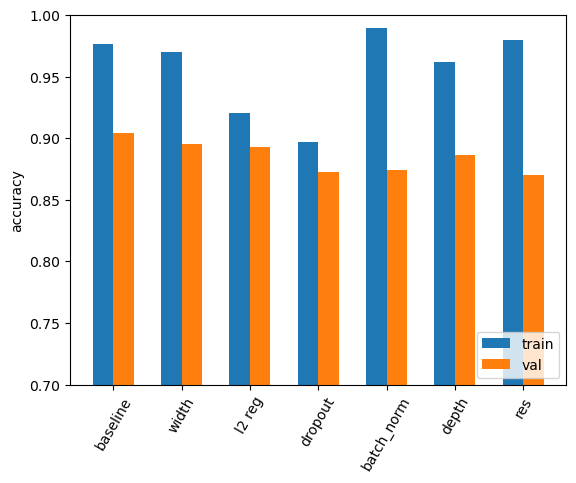

In [129]:
import numpy as np

trn_acc = [v['trian'] for k, v in all_acc_dict.items()]
val_acc = [v['val'] for k, v in all_acc_dict.items()]

width =0.3
plt.bar(np.arange(len(trn_acc)), trn_acc, width=width, label='train')
plt.bar(np.arange(len(val_acc))+ width, val_acc, width=width, label='val')
plt.xticks(np.arange(len(val_acc))+ width/2, list(all_acc_dict.keys()),
           rotation=60)
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.ylim(0.7, 1)
plt.savefig('dataset/chapter 8/accuracy_comparison.png', bbox_inches='tight')
plt.show()